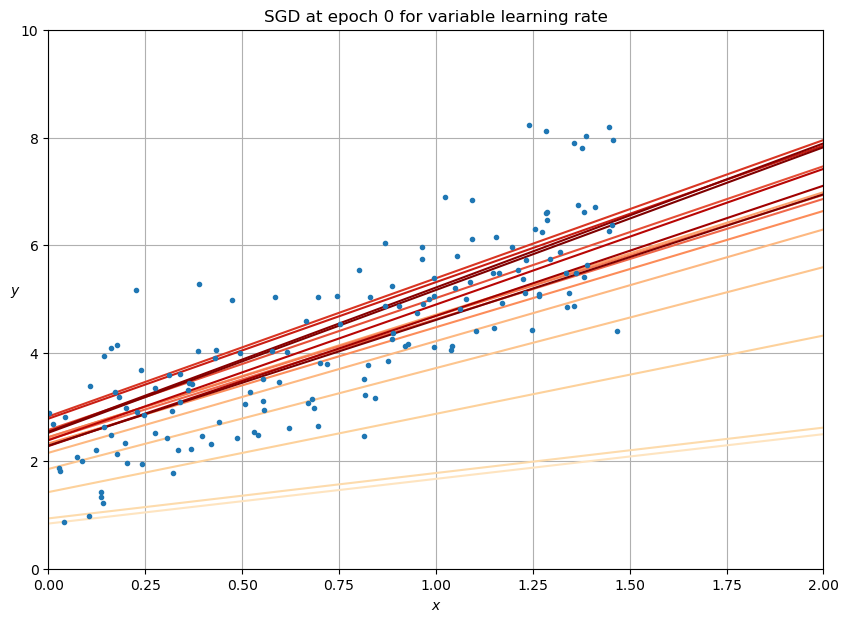

In [144]:
'''Stochastic Gradient Descent (SGD)'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature

m = 150
X = 1.5 * np.random.rand(m,1)
y = 2 + 3*X + np.random.randn(m,1)
x_train = add_dummy_feature(X)

x_topredict = np.array([[0], [3]])
x_topredict_resized = add_dummy_feature(x_topredict)

# Initialize parameters
epochs = 50
n_lines = 17
m = len(x_train)

pheta = np.random.randn(2, 1)
plt.figure(figsize=(10, 7))

#Define a learning schedule to vary learning rate:

def learning_schedule(t,t0=1000,alpha=0.01):
    
    return 1.0 / (alpha*(t + t0))
for epoch in range(epochs):               
    for instance in range(m):
        index = np.random.randint(0,m)
        xm = x_train[index:index+1]
        ym = y[index:index+1]
        gradient = 2 * xm.T @ (xm @ pheta - ym)
        eta = learning_schedule(epoch * m + instance)
        pheta = pheta - (eta * gradient)
        y_predict = x_topredict_resized @ pheta
        if epoch==0 and instance < n_lines:
            color = plt.cm.OrRd(instance / n_lines + 0.15)  # Varying color from light to dark
            plt.plot(x_topredict, y_predict,'-', color=color)
            plt.xlabel("$x$")
            plt.title(fr"SGD at epoch 0 for variable learning rate")
            plt.axis([0, 2, 0, 10])
            plt.grid()

            
plt.plot(X,y,'.')
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.show();

In [105]:
pheta

array([[2.11460281],
       [3.06237305]])

In [141]:
# linear regression using stochastic GD with Scikit-Learn:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000,
                            tol=1e-5,penalty=None,
                            eta0=0.01,
                            n_iter_no_change=90)
sgd_regressor.fit(X,y.ravel())

SGDRegressor(n_iter_no_change=90, penalty=None, tol=1e-05)

In [137]:
y.shape,y.ravel().shape

((150, 1), (150,))

In [142]:
sgd_regressor.intercept_,sgd_regressor.coef_

(array([1.79779528]), array([3.16768235]))